In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

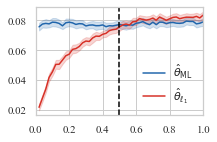

In [7]:
from matplotlib import rcParams
from matplotlib import font_manager
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14

def plot_sparsity_figure(norm="Sigma"):
    _df = pd.read_csv("data_csv_4fig12/exp1_sigma01_n100_seeds20.csv")
    if norm == "Sigma":
        df = _df[["k", "seed", "es_mle", "es_mlre"]]
    else: # L2 norm
        df = _df[["k", "seed", "e_mle", "e_mlre"]]
    df.columns = ["k", "seed", "mle", r"mle-$\ell_1$"]
    df = df.copy()
    df['Sparsity'] = df['k'] / 100 
    df[r"$\hat{\theta}_{\mathrm{ML}}$"] = df['mle']
    df[r"$\hat{\theta}_{\ell_1}$"] = df[r"mle-$\ell_1$"]
    del df["k"]

    df = df.melt(id_vars=["Sparsity", "seed"], value_vars=[r"$\hat{\theta}_{\mathrm{ML}}$", r"$\hat{\theta}_{\ell_1}$"], var_name="Estimator", value_name="Error")
    return df

df = plot_sparsity_figure("Sigma")
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.set_xlim(0, 1)
custom_palette = ["#2166ac", "#d73027"]
font = font_manager.FontProperties(family='Times New Roman', size=14)

sns.lineplot(x="Sparsity", y="Error", data=df, hue="Estimator", ax=ax, palette=custom_palette)
ax.axvline(x=0.5, color='black', linestyle='--')
ax.set_xlabel("")
ax.set_ylabel("")

legend = ax.legend(frameon=False, title=None) 
# fig.savefig("sparsity.pdf", dpi=7200, bbox_inches='tight')

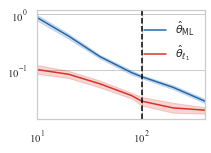

In [ ]:
def plot_varying_n_figure(norm="Sigma"):
    _df = pd.read_csv("data_csv_4fig12/exp2_seeds20_beta05.csv")
    if norm == "Sigma":
        df = _df[["m", "seed", "es_mle", "es_mlre"]]
    else: # L2 norm
        df = _df[["m", "seed", "e_mle", "e_mlre"]]
    df.columns = ["n", "seed", "mle", r"mle-$\ell_1$"]
    df = df.copy()
    df[r"$\hat{\theta}_{\mathrm{ML}}$"] = df['mle']
    df[r"$\hat{\theta}_{\ell_1}$"] = df[r"mle-$\ell_1$"]
    df = df.melt(id_vars=["n", "seed"], value_vars=[r"$\hat{\theta}_{\mathrm{ML}}$", r"$\hat{\theta}_{\ell_1}$"], var_name="Estimator", value_name="Error")
    return df

font = font_manager.FontProperties(family='Times New Roman', size=14)
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14
df = plot_varying_n_figure("Sigma")
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.set_xlim(10, 400)
ax.set_yscale('log')
ax.set_xscale('log')
subset_n = [10, 20, 40, 80, 100, 200, 400]
df = df[df['n'].isin(subset_n)]
sns.lineplot(x="n", y="Error", data=df, hue="Estimator", ax=ax, palette=custom_palette)
ax.set_xlabel("")
ax.set_ylabel("")
ax.axvline(x=100, color='black', linestyle='--')
legend = ax.legend(frameon=False, title=None)
# fig.savefig("n.pdf", dpi=7200, bbox_inches='tight')